<a href="https://colab.research.google.com/github/AramisAraujo/ri_lab_03/blob/master/RI_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Imports
import pandas as pd
import nltk
import re
import altair as alt
import math
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from operator import itemgetter 

In [0]:
csvUrl = 'https://raw.githubusercontent.com/AramisAraujo/ri_lab_01/master/output/results.csv'
nltk.download('stopwords')
stopWords = stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
dataframe = pd.read_csv(csvUrl)




##Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia.
É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas) 

In [0]:
# Builds word frequency dictionay
wordFrequency = {}
wordsWStop = {}

#This matches with words in portuguese
regexWords = r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})'

for documentText in dataframe['text']:  
  words = re.findall(regexWords, documentText)
  for word in words:
    countWStop = wordsWStop.get(word.lower(),0)
    wordsWStop[word.lower()] = countWStop + 1
    #Ignoring Stopwords
    if not word in stopWords:
      count = wordFrequency.get(word.lower(),0)
      wordFrequency[word.lower()] = count + 1

      

In [0]:
#Total word occurences
for key, value in reversed(sorted(wordFrequency.items(),
                                  key = itemgetter(1))):
  print (key, value)

In [0]:
#Vocabulary Size

vocabLenWStop = len(wordsWStop.keys())
print ("Tamanho do vocabulário com Stopwords: "+ str(vocabLenWStop))

vocabLen = len(wordFrequency.keys())
print ("Tamanho do vocabulário sem Stopwords: "+ str(vocabLen))


Tamanho do vocabulário com Stopwords: 10578
Tamanho do vocabulário sem Stopwords: 10529


##Refaça a questão 2 do Laboratório anterior usando os tokens produzidos


In [0]:
#Ordena as palavras pela frequêcia ignorando stopwords
sortedWords = []

for word, freq in reversed(
    sorted(wordFrequency.items(),key = itemgetter(1))):
    sortedWords.append((word, freq))
    
print(sortedWords)


[('bolsonaro', 552), ('disse', 408), ('jair', 399), ('presidente', 398), ('governo', 369), ('ministro', 293), ('reforma', 270), ('ser', 261), ('vai', 255), ('paulo', 232), ('sobre', 223), ('segundo', 223), ('hoje', 221), ('câmara', 217), ('previdência', 206), ('ele', 172), ('contra', 158), ('brasil', 158), ('deputado', 157), ('diz', 152), ('guedes', 150), ('federal', 143), ('ainda', 141), ('lula', 140), ('ter', 136), ('não', 135), ('ccj', 131), ('pode', 129), ('stf', 120), ('dias', 119), ('ministério', 119), ('leia', 118), ('ano', 116), ('afirmou', 115), ('anos', 113), ('fazer', 108), ('justiça', 105), ('país', 103), ('agora', 103), ('prisão', 98), ('moro', 96), ('rio', 94), ('lava', 94), ('política', 90), ('novo', 90), ('deputados', 89), ('partido', 88), ('nota', 86), ('proposta', 85), ('senado', 83), ('porque', 83), ('folha', 83), ('gente', 81), ('milhões', 81), ('dois', 81), ('parte', 79), ('caso', 79), ('defesa', 77), ('decisão', 77), ('marcelo', 76), ('congresso', 76), ('comissão'

In [0]:
tabela = pd.DataFrame(columns=['Word', 'Frequency',
                               'r', 'Pr(%)', 'r*Pr'])


In [0]:
#Preenche coluna 'Word' das tabelas
tabela['Word'] = [word[0] for word in sortedWords]


In [0]:
#Preenche coluna 'Frequency' das tabelas
tabela['Frequency'] = [word[1] for word in sortedWords]

In [0]:
tabela['r'] = [r + 1 for r in range (0, len(sortedWords))]


In [0]:
tabela['Pr(%)'] = [round ((word[1] / vocabLen) * 100, 2) 
                   for word in sortedWords ]


In [0]:
tabela['r*Pr'] = round((tabela['Pr(%)']/100 * tabela['r']), 3)


In [0]:
tabela.set_index('r').head(50)

##Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos.
Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos. 

In [0]:
stemmer = nltk.stem.SnowballStemmer('portuguese')

stemmedWords = {w:stemmer.stem(w) for w in wordFrequency.keys()}

setStemmed = sorted(set(stemmedWords.values()))
setWords = sorted(set(wordFrequency.keys()))

print("Conjunto de palavras sem Stemming:",len(setWords))
print("Conjunto de palavras com Stemming:",len(setStemmed))

stems = pd.DataFrame(columns=['Word', 'Stem'])
stems['Word'] = stemmedWords.keys()
stems['Stem'] = stemmedWords.values()
stems.head(100)



falso positivos: Paulo, Guedes, Sábado, Pena, Tomada, Julgamento, Leilões, Agosto, Santos, Paranaguá

falso negativos:

##Refaça a questão 3 do Laboratório anterior usando os tokens stemizados.
Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais? 

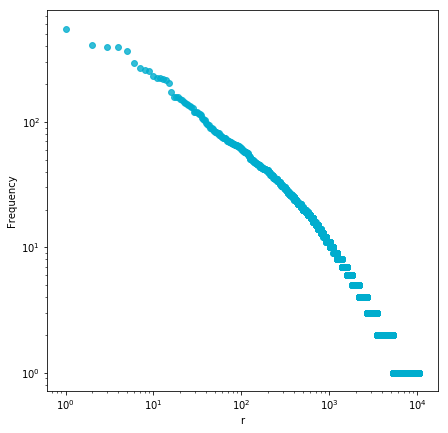

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", tabela, ax=ax, marker="o",
            scatter_kws={"s": 35}, fit_reg = False, color="#00adce")


In [0]:
bigramas = []

bigramas = nltk.bigrams(wordFrequency.keys())

bigramas_freq = nltk.FreqDist(bigramas)

bigramas_df = pd.DataFrame(bigramas_freq.most_common(), columns=['word', 'freq'])
bigramas_df['r'] = bigramas_df['freq'].rank(ascending=False)


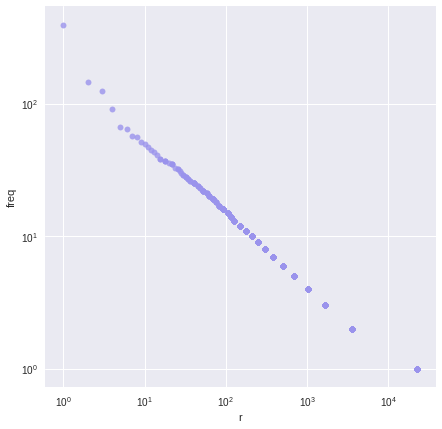

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", bigramas_df, ax=ax, marker="o",
            scatter_kws={"s": 35}, fit_reg = False, color="#9a93ec")